In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
import numpy as np
print(X_train_full.shape)
print(y_train_full.shape)
print(np.unique(y_train_full))
print(X_test.shape)
print(y_test.shape)
print(X_train_full.max())

(60000, 28, 28)
(60000,)
[0 1 2 3 4 5 6 7 8 9]
(10000, 28, 28)
(10000,)
255


In [9]:
X_valid = X_train_full[:5000]/255.0 
X_train = X_train_full[5000:]/255.0
print(X_train.max())
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0
print('y_valid: ', y_valid.shape)
print('y_train: ', y_train.shape)

1.0
y_valid:  (5000,)
y_train:  (55000,)


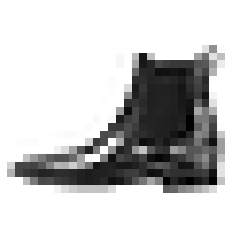

9


In [15]:
plt.imshow(X_train[5], cmap="binary")
plt.axis('off')
plt.show()
print(y_train[5])

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
l1=300*784+300
print(300*784+300)
# We can get a model's listo of layers
l2= 100*300+100
print(100*300+100)
print(10*100)
l3 = 1010
print(l1+l2+l3)
model.layers

235500
30100
1000
266610


In [24]:
# fetch a layer by its index
hidden1 = model.layers[1]
# fetch it by name:
hidden1.name
#model.get_layer('dense') is hidden1

'dense'

In [25]:
weights, biases = hidden1.get_weights()
print(weights)
print(biases)

[[ 0.01233499 -0.06089669  0.03957867 ... -0.01978182 -0.01961191
  -0.01570699]
 [-0.00285668 -0.0454924   0.05919139 ...  0.05028307  0.02584797
  -0.00060447]
 [ 0.03574689  0.05860497 -0.01219774 ... -0.06915542 -0.01781894
  -0.00047706]
 ...
 [ 0.01091398 -0.05720575  0.05851415 ...  0.04065523  0.00142981
  -0.05791395]
 [-0.02219142 -0.06261081 -0.03607486 ...  0.03075495 -0.04800653
  -0.05683299]
 [-0.00719242 -0.02203043 -0.07262262 ...  0.0037899  -0.01771052
  -0.02225074]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [26]:
# After a model is created, call its compile() method to specify the less function and the optimizer to use
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [27]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7208 - accuracy: 0.7625 - val_loss: 0.5386 - val_accuracy: 0.8184
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4904 - accuracy: 0.8284 - val_loss: 0.4522 - val_accuracy: 0.8492
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4418 - accuracy: 0.8449 - val_loss: 0.4121 - val_accuracy: 0.8584
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4163 - accuracy: 0.8530 - val_loss: 0.3925 - val_accuracy: 0.8684
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3966 - accuracy: 0.8592 - val_loss: 0.3842 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8661 - val_loss: 0.3670 - val_accuracy: 0.8746
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3666 - accuracy: 0.8686 - val_loss: 0.3708 - val_accuracy:

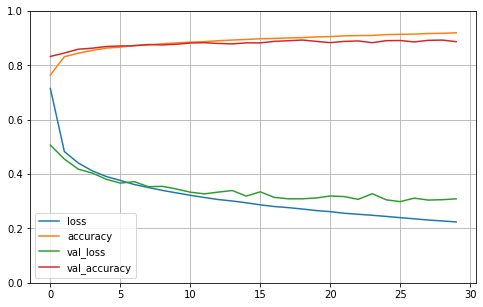

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 2.9478 - accuracy: 0.1000


[2.947763681411743, 0.10000000149011612]

In [29]:
# Using the model to make predictions
# Use the first three instances of he test set
X_new = X_test[:3]
y_prob =model.predict(X_new)
y_prob.round(2)

array([[0.08, 0.02, 0.06, 0.12, 0.01, 0.47, 0.1 , 0.11, 0.01, 0.01],
       [0.09, 0.02, 0.06, 0.13, 0.01, 0.45, 0.1 , 0.11, 0.01, 0.01],
       [0.09, 0.03, 0.06, 0.13, 0.01, 0.44, 0.1 , 0.11, 0.01, 0.01]],
      dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Sandal', 'Sandal', 'Sandal'], dtype='<U11')